In [80]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from numpy import quantile
import warnings


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [81]:
df = pd.read_csv(r'..\..\datasets\df_norm_most_common_ncm.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76457 entries, 0 to 76456
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nf_timestamp     76457 non-null  float64
 1   emit_lat         76457 non-null  float64
 2   emit_long        76457 non-null  float64
 3   prod_quant       76457 non-null  float64
 4   prod_valor_unit  76457 non-null  float64
dtypes: float64(5)
memory usage: 2.9 MB


In [82]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df)
    kmeanModel.fit(df)
 
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

Text(0.5, 1.0, 'The Elbow Method using Distortion')

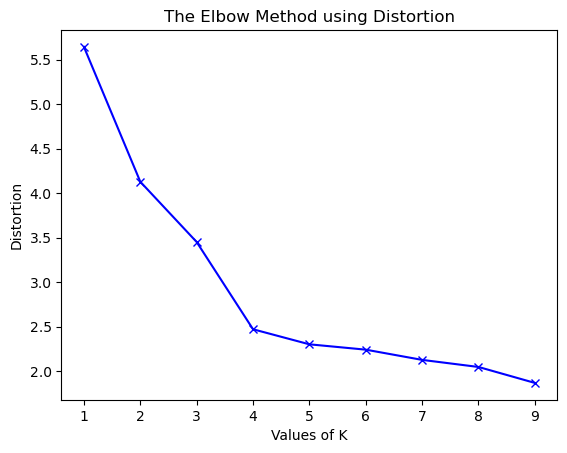

In [83]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')

In [84]:
new_df = df.copy()
kmeans = KMeans(n_clusters=4)
new_df['cluster'] = kmeans.fit_predict(new_df)

In [85]:
cluster_counts = new_df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']
cluster_counts

,Cluster,Count
0,2,41139
1,0,27288
2,3,4751
3,1,3279


In [86]:
model = LocalOutlierFactor(n_neighbors=10) 
model.fit_predict(df)
df['anomaly_score'] = model.negative_outlier_factor_ 

outlier_thresh = 0.01

thresh = quantile(df['anomaly_score'], outlier_thresh)

print(thresh)

df_outliers = df[df['anomaly_score'] <= thresh]

df_outliers

-2.5799215992199276


,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit,anomaly_score
106,0.686284,0.897163,-1.188215,0.693147,3.109061,-2.952021e+00
108,0.686284,0.897163,-1.188215,0.693147,3.269569,-2.985395e+08
154,0.424449,0.897163,-1.188215,0.693147,3.173041,-7.442807e+08
617,0.028736,0.897163,-1.188215,8.295299,0.963174,-3.089249e+00
655,0.792582,0.897163,-1.188215,1.791759,4.007333,-2.862242e+00
...,...,...,...,...,...,...
76343,0.990764,-54.679088,-7.269962,6.216606,1.075002,-2.775741e+00
76427,0.875067,8.889834,-1.113046,7.576097,1.435085,-3.983160e+00
76451,0.927766,-36.293552,-5.978351,6.572283,2.042518,-6.319901e+02
76452,0.927766,-36.293552,-5.978351,6.368187,2.042518,-6.009080e+02


In [87]:
df_outliers['idx'] = df_outliers.index
df_outliers = df_outliers.sort_values(by='anomaly_score', ascending=True)
df_outliers.to_csv('output\outliers.csv', index=False)
df_outliers

,nf_timestamp,emit_lat,emit_long,prod_quant,prod_valor_unit,anomaly_score,idx
72126,0.936271,-25.333011,-5.930694,7.783641,1.916923,-3.255977e+09,72126
72187,0.936271,-25.333011,-5.930694,7.601402,1.916923,-2.871212e+09,72187
49364,0.622892,0.673588,0.461986,1.386294,2.525729,-2.509168e+09,49364
49143,0.561132,0.673588,0.461986,1.386294,2.215937,-2.403298e+09,49143
68373,0.701419,0.874078,0.446011,1.609438,2.397895,-2.167415e+09,68373
...,...,...,...,...,...,...,...
67036,0.516578,0.398100,-0.081279,1.945910,5.671500,-2.589875e+00,67036
74414,0.485084,0.805871,-0.540171,0.693147,3.856933,-2.588314e+00,74414
59750,0.638508,2.368352,-0.829046,0.693147,3.449352,-2.586362e+00,59750
63969,0.331823,1.912799,-0.209339,3.258097,5.157157,-2.582302e+00,63969
